<div style="text-align:center">
  <h1 style="color:red;">XGBOOST ALGORITHM FOR Regression</h1>
</div>

<div style="padding-top:1px;padding-left:20px;">
<h3 style="color:green;">réalisé par :</h3>
<div style="padding-left:80px;">
<h2>EL HARIRI OMAR</h2>
<h2>ASSKLOU MERIEM</h2>
</div>
<div style="padding-top:1px;padding-left:20px;">
<h3 style="color:green;">Encadre par  :</h3>
<div style="padding-left:80px;">
<h2>Pr. GHAZDALI Abdelghani</h2>
<h2>Pr. Khalfi Hamza</h2>
</div>
</div>

# importer les bibliothèques et notre model

In [1]:
import XGBRegressor as XGBRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# importer les données


In [2]:

df = pd.read_csv("Advance House Price Predictions.csv")
df

,Id,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,Pave,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,Pave,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,Pave,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,Pave,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,Pave,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Pave,6,5,1999,2000,0.0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,Pave,6,6,1978,1988,119.0,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,Pave,7,9,1941,2006,0.0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,Pave,5,6,1950,1996,0.0,...,366,0,112,0,0,0,0,4,2010,142125


# Encodage des variables catégorielles pour la modélisation

In [3]:
le = LabelEncoder()
df["Street"] = le.fit_transform(df["Street"])
df["CentralAir"] = le.fit_transform(df["CentralAir"])


# Analyse de la structure des données 

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   OverallQual    1460 non-null   int64  
 6   OverallCond    1460 non-null   int64  
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   MasVnrArea     1452 non-null   float64
 10  BsmtFinSF1     1460 non-null   int64  
 11  BsmtFinSF2     1460 non-null   int64  
 12  BsmtUnfSF      1460 non-null   int64  
 13  TotalBsmtSF    1460 non-null   int64  
 14  CentralAir     1460 non-null   int32  
 15  1stFlrSF       1460 non-null   int64  
 16  2ndFlrSF       1460 non-null   int64  
 17  LowQualFinSF   1460 non-null   int64  
 18  GrLivAre

# Analyse de la qualité des données : détection et comptage des valeurs manquantes.

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
Street             0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [6]:
(df.isna().sum()/df.shape[0]).sort_values()

Id               0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.000000
BsmtHalfBath     0.000000
GarageArea       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
WoodDeckSF       0.000000
YrSold           0.000000
BsmtFullBath     0.000000
LowQualFinSF     0.000000
MSSubClass       0.000000
LotArea          0.000000
Street           0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
GrLivArea        0.000000
SalePrice        0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
CentralAir       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
BsmtFinSF1       0.000000
MasVnrArea       0.005479
GarageYrBlt 

# Traitement des données manquantes  : imputation des valeurs manquantes par la moyenne des colonnes.

In [7]:
df.fillna(df.mean(), inplace=True)

# détection  des données en double

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

Prendre 1000 individus comme échantillon

In [10]:
df=df.head(1000)

In [11]:
Y = df["SalePrice"]
X = df.drop(["SalePrice"],axis=1)

# Normalisation des données


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
scaler = StandardScaler()


X = scaler.fit_transform(X)
print(X)

[[-1.73031962  0.07387196 -0.23576044 ... -0.08641501 -1.60126451
   0.1281751 ]
 [-1.72685552 -0.87320444  0.47555506 ... -0.08641501 -0.4859189
  -0.62579607]
 [-1.72339142  0.07387196 -0.09349734 ... -0.08641501  1.00120857
   0.1281751 ]
 ...
 [ 1.72339142 -0.87320444  0.00371381 ... -0.08641501 -1.60126451
   0.88214626]
 [ 1.72685552 -0.63643534 -0.4728656  ... -0.08641501 -0.4859189
  -1.37976723]
 [ 1.73031962 -0.87320444 -0.28318147 ... -0.08641501 -1.60126451
   1.63611742]]


 # Préparation des données pour la prédiction

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

# Modélisation de la prédiction des prix des maisons : utilisation de XGBRegressor pour entraîner un modèle de régression.

In [14]:
model  = XGBRegressor.XGBRegressor(n_estimators=40)
model.fit(x_train, y_train, eval_set = (x_test, y_test))

[0] validation_set-rmse : 55524.07523527991	[0] train_set-rmse : 62450.4389918741
[1] validation_set-rmse : 44621.69353952238	[1] train_set-rmse : 47191.67061665189
[2] validation_set-rmse : 37372.0361031444	[2] train_set-rmse : 36279.29007514527
[3] validation_set-rmse : 33135.3253782363	[3] train_set-rmse : 28264.56097563848
[4] validation_set-rmse : 30169.915619775275	[4] train_set-rmse : 22393.774369597006
[5] validation_set-rmse : 28602.69624811974	[5] train_set-rmse : 18161.445055953922
[6] validation_set-rmse : 27724.363323014728	[6] train_set-rmse : 14977.865941851385
[7] validation_set-rmse : 27344.897052707474	[7] train_set-rmse : 12674.58295308612
[8] validation_set-rmse : 27259.61923549383	[8] train_set-rmse : 10725.530408140821
[9] validation_set-rmse : 26978.076237617996	[9] train_set-rmse : 9246.900747643685
[10] validation_set-rmse : 26830.017694033908	[10] train_set-rmse : 8167.187206332482
[11] validation_set-rmse : 26649.63055922518	[11] train_set-rmse : 7410.5939887

# Visualisation de l'historique d'entraînement du modèle XGBoost

<Axes: >

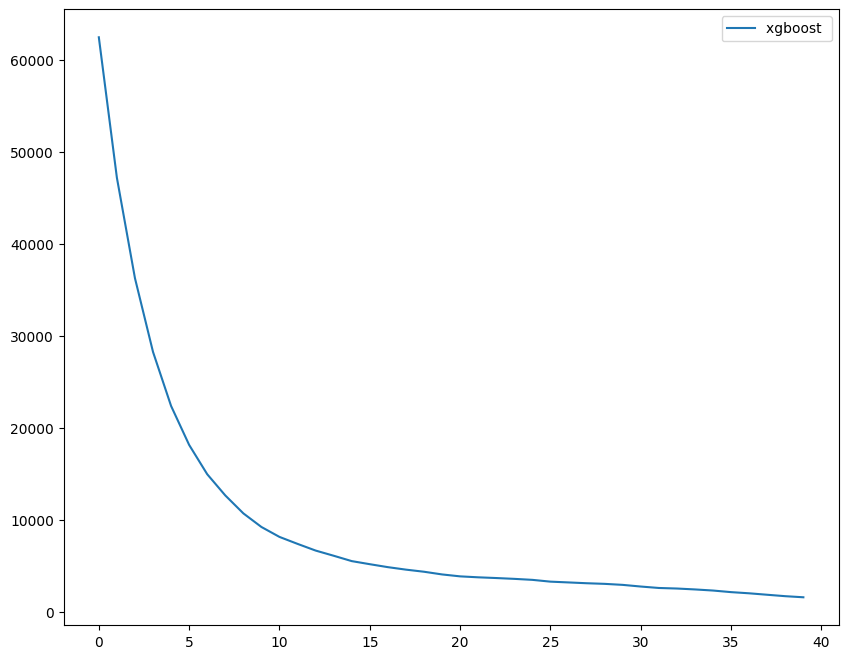

In [15]:
plt.figure(figsize=(10, 8))
results = model.history
sns.lineplot(y = results["train"], x = range(len(results["train"])), label="xgboost ")

# Calcul de l'erreur quadratique moyenne et du coefficient de détermination pour le modèle XGBoost

In [16]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

from sklearn.metrics import r2_score



r2_score(y_test, y_pred)

0.8570323360717026